# Importing Libraries

In [36]:
import tweepy
import pandas as pd
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [37]:
consumer_key= '########################################'
consumer_secret= '########################################'
access_token= '########################################'
access_token_secret= '########################################'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [46]:
#ref: https://github.com/tweepy/tweepy/issues/974
first_100_joe = []
query = "#JoeBiden"
for tweet_info in tweepy.Cursor(api.search, q=query, lang = 'en', tweet_mode='extended').items(1000):
    if 'retweeted_status' in dir(tweet_info):
        tweet=tweet_info.retweeted_status.full_text
        first_100_joe.append(tweet)
else:
    tweet=tweet_info.full_text
    first_100_joe.append(tweet)

In [47]:
len(first_100_joe)

585

In [48]:
first_100_joe = pd.DataFrame(first_100_joe)
#saving it to txt file
first_100_joe.to_csv('first_100_joe.txt', index=None, header = None, sep='\n', mode='a')

In [49]:
df_tweet = first_100_joe.rename(columns={0:'text'})
df_tweet

,text
0,Are you Happy about all the #ExecutiveOrders #...
1,Between 150 and 200 troops of the National Gua...
2,#Telangana bidda in #PresidentBiden team. Indi...
3,#KimClement Prophecy As It Is Written. #JoeBid...
4,"So far, in the first few days of his presidenc..."
...,...
580,"Just noticed, We can see the shadows of #JoeBi..."
581,How sad algerian military dictature must be af...
582,"#JoeBiden : ""I don't know what I'm signing...""..."
583,Joe Biden warned 'aggressive' Cabinet picks th...


# Text PreProcessing

In [51]:
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import word_tokenize
stemmer = SnowballStemmer("english")
stopWords = stopwords.words("english")
stopWords.remove('not')
stopWords.remove('no')
stopWords.remove('against')
stopWords.remove('because')
stopWords.remove('while')
stopWords.remove('why')
stopWords.remove('how')
stopWords.remove('can')

def preprocessing_text(txt):
    txt = txt.lower()
    txt = txt.replace(",000,000", "m").replace(",000","k").replace("′", "'").replace("’", "'").replace("can't", "cannot")\
             .replace("don't", "do not").replace("isn't", "is not").replace("you're", "you are").replace("you've","you have")\
             .replace("you'll", "you will").replace("that'll",'that will').replace("should've", "should have")\
             .replace("aren't", "are not").replace("couldn't", "could not").replace("didn't", "did not")\
             .replace("doesn't", "does not").replace("hadn't", "had not").replace("hasn't", "has not")\
             .replace("haven't", "have not").replace("mustn't", "must not").replace("wasn't", "was not")\
             .replace("i'm", "i am").replace("he's", "he is").replace("she's", "she is").replace("ain't", "am not")\
             .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ").replace("€", " euro ")\
             .replace("'ll", " will").replace("'ve", " have").replace("it's", "it is")
    
    txt = re.sub('[^A-Za-z]+', ' ', txt) #removing html tags
    txt = re.sub('[?|!|\'|"|#]','',txt) #removing punctuations
    txt = re.sub('[.|,|)|(|\|/]','',txt) #removing punctuations
    
    txt = word_tokenize(txt) #it will tokenize all the words automatically
    
    txt = ' '.join(str(stemmer.stem(j)) for j in txt if j not in stopWords and len(j)!=1)  #stemming and removing stop words
    
    return txt

df_tweet['clean_text'] = df_tweet['text'].apply(preprocessing_text)

In [52]:
df_tweet

,text,clean_text
0,Are you Happy about all the #ExecutiveOrders #...,happi executiveord potus joebiden sign first d...
1,Between 150 and 200 troops of the National Gua...,troop nation guard provid secur presid joe bid...
2,#Telangana bidda in #PresidentBiden team. Indi...,telangana bidda presidentbiden team indian ame...
3,#KimClement Prophecy As It Is Written. #JoeBid...,kimclement propheci written joebiden elect tru...
4,"So far, in the first few days of his presidenc...",far first day presid approv disapprov potus jo...
...,...,...
580,"Just noticed, We can see the shadows of #JoeBi...",notic can see shadow joebiden amp drjillbiden ...
581,How sad algerian military dictature must be af...,how sad algerian militari dictatur must sovere...
582,"#JoeBiden : ""I don't know what I'm signing...""...",joebiden not know sign https co ia gtflyhn
583,Joe Biden warned 'aggressive' Cabinet picks th...,joe biden warn aggress cabinet pick threaten r...


In [53]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt  
df_tweet['clean_text'] = df_tweet['clean_text'].apply(lambda row:remove_pattern(row, "@[\w]*"))

df_tweet.head(5)

,text,clean_text
0,Are you Happy about all the #ExecutiveOrders #...,happi executiveord potus joebiden sign first d...
1,Between 150 and 200 troops of the National Gua...,troop nation guard provid secur presid joe bid...
2,#Telangana bidda in #PresidentBiden team. Indi...,telangana bidda presidentbiden team indian ame...
3,#KimClement Prophecy As It Is Written. #JoeBid...,kimclement propheci written joebiden elect tru...
4,"So far, in the first few days of his presidenc...",far first day presid approv disapprov potus jo...


# Sentiment Analysis using VaderSentiment

In [54]:
analyser = SentimentIntensityAnalyzer()

# empty list to store VADER polarities
vs_polarity = []

# loop over tweets
for sentence in df_tweet['clean_text']:
    vs_polarity.append(analyser.polarity_scores(sentence)['compound'])

# add new column `'vs_polarity'` to data
df_tweet['vs_polarity'] = vs_polarity

df_tweet.head(10)

,text,clean_text,vs_polarity
0,Are you Happy about all the #ExecutiveOrders #...,happi executiveord potus joebiden sign first d...,0.3612
1,Between 150 and 200 troops of the National Gua...,troop nation guard provid secur presid joe bid...,0.0000
2,#Telangana bidda in #PresidentBiden team. Indi...,telangana bidda presidentbiden team indian ame...,0.0000
3,#KimClement Prophecy As It Is Written. #JoeBid...,kimclement propheci written joebiden elect tru...,0.4215
4,"So far, in the first few days of his presidenc...",far first day presid approv disapprov potus jo...,0.0000
5,"Karine Jean-Pierre (@KJP46), Deputy Assistant ...",karin jean pierr kjp deputi assist presid joeb...,0.8176
6,"Karine Jean-Pierre (@KJP46), Deputy Assistant ...",karin jean pierr kjp deputi assist presid joeb...,0.8176
7,What does the world think of what's happening ...,world think happen get adellenaz get insight a...,0.0000
8,Between 150 and 200 troops of the National Gua...,troop nation guard provid secur presid joe bid...,0.0000
9,#JoeBiden took 17 important decisions for the ...,joebiden took import decis ppl unitedst usa po...,-0.6734


In [55]:
df = df_tweet

In [56]:
df.vs_polarity.min()

-0.9432

In [57]:
df.vs_polarity.max()

0.872

In [62]:
df.loc[df['vs_polarity'] < 0.6, 'vs_polarity'] = 0
df.loc[df['vs_polarity'] > 0.6, 'vs_polarity'] = 1

In [63]:
df_tweet[df_tweet['vs_polarity'] > 0.6]['clean_text'].iloc[10]

'karin jean pierr kjp deputi assist presid joebiden whitehous princip deputi press secretari join thesundayshow tomorrow morn join capehartj great guest start et sundaymorn msnbc https co zqeptlrutw'

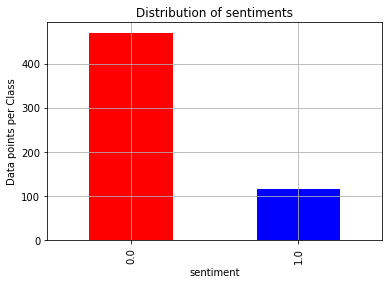

In [64]:
df['vs_polarity'].value_counts().plot(kind = 'bar',color=['r','b'])
plt.xlabel('sentiment')
plt.ylabel('Data points per Class')
plt.title('Distribution of sentiments')
plt.grid()
plt.show()

# Word cloud for postive data

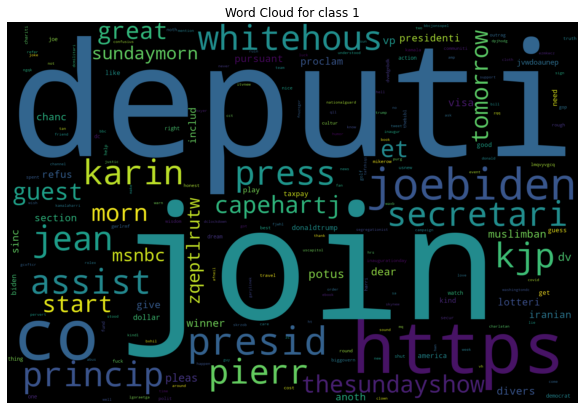

In [65]:
from wordcloud import WordCloud, STOPWORDS
freq_dict = dict()
for q1 in df[df['vs_polarity'] == 1]['clean_text']:
    for word in q1.split(" "):
        freq_dict[word] = freq_dict.get(word, 0) + 1
feat_count_sorted = dict(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))
count_data = {"Words":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)

worcloudPlot = WordCloud(background_color="black", width=1500, height=1000)
worcloudPlot.generate_from_frequencies(frequencies=freq_dict)
plt.figure(figsize=(15,7))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for class 1')
plt.show()

# Word cloud for negative data

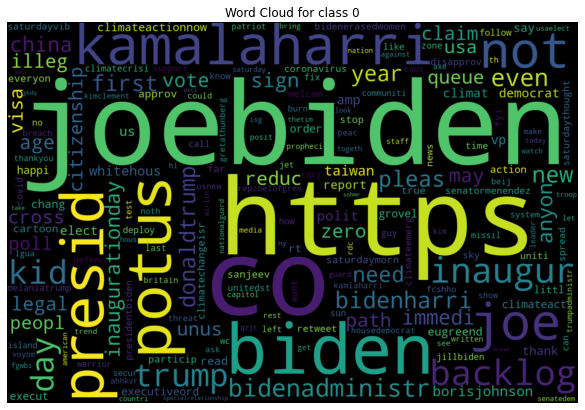

In [66]:
from wordcloud import WordCloud, STOPWORDS
freq_dict = dict()
for q1 in df[df['vs_polarity'] == 0]['clean_text']:
    for word in q1.split(" "):
        freq_dict[word] = freq_dict.get(word, 0) + 1
feat_count_sorted = dict(sorted(freq_dict.items(), key = lambda x: x[1], reverse = True))
count_data = {"Words":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)

worcloudPlot = WordCloud(background_color="black", width=1500, height=1000)
worcloudPlot.generate_from_frequencies(frequencies=freq_dict)
plt.figure(figsize=(15,7))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for class 0')
plt.show()

# Some Positive Tweets

In [73]:
for i in range(0,10):
    print(df_tweet[df_tweet['vs_polarity'] > 0.6]['text'].iloc[i])
    print("="*50)

Karine Jean-Pierre (@KJP46), Deputy Assistant to President #JoeBiden and @WhiteHouse Principal Deputy Press Secretary, joins @TheSundayShow tomorrow morning! Join @CapehartJ for this great guest and more, starting at 10 AM ET this #SundayMorning on @MSNBC. https://t.co/ZqePtlruTW
Karine Jean-Pierre (@KJP46), Deputy Assistant to President #JoeBiden and @WhiteHouse Principal Deputy Press Secretary, joins @TheSundayShow tomorrow morning! Join @CapehartJ for this great guest and more, starting at 10 AM ET this #SundayMorning on @MSNBC. https://t.co/ZqePtlruTW
This is The guy that’s been playing the purge sound he’s has been playing this all week around dc I don’t know if this is a warning sign or what t-12 hrs until the event #Inauguration #WashingtonDC #DC #NationalGuard #DClockdown #DCmilitary #USCapitol #InaugurationDay #JoeBiden https://t.co/T0Qll2WaXB
This type of drivel was written about #HillaryforPrison in 1993, too...

...that went well.

To use a favoured expression of the new pr

# Some Negative Tweets

In [77]:
for i in range(0,10):
    print(df_tweet[df_tweet['vs_polarity'] < 0.5]['text'].iloc[i])
    print("="*50)

Are you Happy about all the #ExecutiveOrders #POTUS @JoeBiden has signed in his first 2 days??

Please Vote and Retweet to spread poll, Thanks!

EVERYONE WELCOME TO PARTICIPATE!

#Biden #JoeBiden #BidenErasedWomen #BidenHarris #BidenHarris2020 #SaturdayMorning #SaturdayVibes
Between 150 and 200 troops of the National Guard who provided security for President Joe Biden's inauguration have tested positive for the coronavirus. https://t.co/RXOQwtsnVk #capitolriots #capitol #joebiden #presidentjoebiden #nationalguard #inauguration #abc7ny https://t.co/6lSRqpOg0Q
#Telangana bidda in #PresidentBiden team. Indian American speechwriter and political advisor #VinayReddy is the new Director of Speechwriting at #WhiteHouse.  #WhiteHouse #JoeBiden #USAElections2020 #PresidentBiden https://t.co/lM7dRHu0Q2 https://t.co/KC8hpjdV1N
#KimClement Prophecy As It Is Written. #JoeBiden #Election2020 #Trump 

He Was A True Warrior And Patriot. Thankyou Kim. Rest In Peace! 🙏🙏

Read Below.... https://t.co/AHhK